# Paket Prabayar Manakah yang Lebih Baik?

Anda bekerja sebagai seorang analis di perusahaan operator telekomunikasi bernama Megaline. Perusahaan tersebut menawarkan kliennya dua jenis paket prabayar, yaitu paket Surf dan paket Ultimate. Departemen periklanan ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan, sehingga mereka bisa membuat anggaran iklan yang sesuai.

Anda akan melakukan analisis awal untuk paket-paket prabayar tersebut berdasarkan sampel klien yang berukuran relatif kecil. Anda memiliki 500 data klien Megaline, yang berisi informasi seperti: siapa mereka, dari mana asalnya, jenis paket apa yang mereka gunakan, serta jumlah panggilan dan pesan yang mereka kirim di tahun 2018. Tugas Anda adalah untuk menganalisis perilaku para pengguna, lalu menentukan paket prabayar manakah yang lebih menguntungkan.

Dataset yang dimiliki perusahaan Megaline diantaranya berisi `calls`, `internet`, `messages`, `plans` dan `users` yang semuanya memiliki informasi yang penting untuk analisis projek ini. Tujuan dari projek ini adalah selain untuk mencari pendapatan terbanyak dari kedua paket prabayar tersebut namun juga menganalisis prilaku pengguna seperti durasi telepon, jumlah sms dan jumlah penggunaan data internet terhadap kedua paket prabayar tersebut. Beberapa hipotesis diajukan sebagai berikut:

1. Benarkah untuk kategori durasi telepon terbanyak dalam satu bulan dimiliki oleh Paket Ultimate?
2. Benarkah untuk kategori jumlah sms terbanyak dalam satu bulan dimiliki oleh Paket Ultimate?
3. Berapakah rata-rata penggunaan kisaran jumlah data internet per bulan untuk kedua tipe Paket Prabayar?
4. Benarkah jumlah pendapatan terbanyak dari pengguna per bulan dimiliki oleh Paket Ultimate?
5. Benarkah Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Berbeda?
7. Benarkah Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ dengan Wilayah Lain adalah Berbeda?

# Daftar Isi <a id='back'></a>
* [Tahap 1 Inisialisasi](#inisial)
    * [Tahap 1.1 Memuat Data](#load)
* [Tahap 2 Mempersiapkan Data](#prep)
    * [Tahap 2.1 Paket Prabayar](#paket)
    * [Tahap 2.2 Pengguna](#user)
    * [Tahap 2.3 Panggilan](#call)
    * [Tahap 2.4 Pesan/SMS](#sms)
    * [Tahap 2.5 Internet](#inter)
* [Tahap 3 Syarat dan Kondisi paket](#snk)
    * [Tahap 3.1 Agregasi Data](#agg)
    * [Tahap 3.2 Perilaku Pengguna](#adj)
    * [Tahap 3.3 Pendapatan Pengguna](#inc)
* [Tahap 4 Menguji Hipotesis](#hipo)
* [Tahap 5 Kesimpulan Umum](#conc)

# Inisialisasi<a id='inisial'></a>

Memuat semua library yang dibutuhkan:

In [1]:
# Muat semua library
import pandas as pd # memproses dataframe
import numpy as np # memproses statistik deskriptif
import matplotlib.pyplot as plt # memvisualisasikan data
import seaborn as sns # memvisualisasikan data
import math as mt # menambahkan fungsi matematika
from scipy import stats as st # memproses hipotesis

# set tema seaborn
sns.set_theme(palette='bright')

## Memuat Data<a id='load'></a>

Memasukkan data:

In [2]:
# Muat file data ke dalam DataFrame yang berbeda
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

# Mempersiapkan Data<a id='prep'></a>

Membagi Data untuk proyek ini dibagi menjadi beberapa tabel. Menjelajahi masing-masing tabel untuk mendapatkan pemahaman awal tentang data. Lakukan koreksi di setiap tabel jika memang diperlukan

## Paket Prabayar<a id='paket'></a>

In [3]:
# Tampilkan informasi/rangkuman umum tentang DataFrame paket-paket prabayar
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


Dataframe berisi:
* `plan_name` — nama paket telepon
* `usd_monthly_fee` — biaya bulanan dalam dolar AS
* `minutes_included` — alokasi menit panggilan bulanan
* `messages_included` — alokasi SMS bulanan
* `mb_per_month_included` — alokasi volume data bulanan (dalam megabyte)
* `usd_per_minute` — harga per menit jika sudah melebihi batas alokasi paket (misalnya, jika paket memiliki alokasi 100 menit maka penggunaan mulai dari menit ke-101 akan dikenakan biaya)
* `usd_per_message` — harga per SMS jika sudah melebihi batas alokasi paket
*` usd_per_gb` — harga per gigabyte tambahan data jika sudah melebihi batas alokasi paket (1 GB = 1024 megabyte)

In [4]:
# Tampilkan sampel data untuk paket-paket tersebut
plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


DataFrame berisi
* `message included` - paket pesan 
* `mb_per_month_included` - paket internet
* `minutes_included` - paket telepon
* `usd_monthly_pay` - harga per bulan (USD)
* `usd_per_gb` - internet (non-paket)
* `usd_per_message` - pesan (non-paket)
* `usd_per_minute` - telepon (non-paket)
* `plan_name` - nama paket

**Kesimpulan**:
terlihat bahwa tidak ada data yang hilang, data yang terduplikat, dan tipe data yang salah


## Pengguna<a id='user'></a>

In [5]:
# Tampilkan informasi/rangkuman umum tentang DataFrame pengguna
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


DataFrame berisi:

1. `user_id` - kode pelanggan
2. `first_name` - nama depan
3. `last name` - nama belakang
4. `age` - umur
5. `city` - kota
6. `reg_sate` - tanggal berlangganan
7. `plan` - paket yang dipiilih
8. `churn_date` - tanggal pengguna berhenti menggunakan layanan

In [6]:
users.duplicated().sum()

0

In [7]:
# Tampilkan sampel data pengguna
users.sample(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
133,1133,Larry,Barr,50,"Cincinnati, OH-KY-IN MSA",2018-07-21,ultimate,NaN
467,1467,Nickolas,Deleon,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-01-31,ultimate,2018-11-18
103,1103,Moises,Weeks,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-07-01,surf,NaN
230,1230,Andre,Estes,38,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-27,ultimate,NaN
292,1292,Cassey,French,42,"Dallas-Fort Worth-Arlington, TX MSA",2018-01-27,surf,NaN
221,1221,Mckenzie,Wilkinson,18,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-17,surf,NaN
367,1367,Minh,Fischer,18,"Baltimore-Columbia-Towson, MD MSA",2018-07-23,surf,NaN
306,1306,Darron,Craig,19,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-11-26,surf,NaN
179,1179,Darcey,Baird,22,"Dallas-Fort Worth-Arlington, TX MSA",2018-04-27,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN


**Kesimpulan**:

terdapat beberapa permasalahan pada data tersebut:
* `reg_date` memiliki type data yang slaah sehingga harus diubah menjadi tipe data tanggal
* `churn_date` memiliki sejumlah data hilang

### Memperbaiki Data

Memperbaiki tipe data yang salah `reg_date` `object` menjadi `date_time`

In [8]:
# memperbaiki tipe data yang salah pada kolom tanggal
# merubah tipe data `objek` menjadi `datetime`
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

# menampilkan informasi `users`
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


`reg_date` sudah diganti tipe menjadi `date_time`

Selanjutnya mengisi nilai yang hilang pada kolom `churn_date`. Dikarenakan nilai yang hilang merupakan nasabah yang masih aktif hingga saat ini dan tanggal tercatat hanya sepanjang tahun 2018. Maka kita isi nilai tersebut dengan tanggal `2018-12-31`. Kemudian kita lanjutkan dengan mengubah tipe datanya ke `date_time`.

In [9]:
# mengisi nilai yang hilang 
users['churn_date'].fillna('2018-12-31', inplace = True)

# mengubah tipe data `churn_date` menjadi `datetime`
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

# menampilkan informasi `users`
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


`churn_date` telah diisi dan diganti menjadi `datetime`

### Memperkaya Kualitas Data

Untuk memudahkan analisis, diperlukan beberapa kolom tambahan seperti memisahkan `datetime` berdasarkan tanggal, bulan, tahun. Kemudian dilanjutkan pembuatan kolom region yang berisi apakah kota berasal dari wilayah `'NY-NJ`' atau bukan `'other'`.

In [10]:
# memisahkan kolom datetime

# membuat kolom tanggal
users['tanggal'] = users['reg_date'].dt.day

# membuat kolom bulan
users['bulan'] = users['reg_date'].dt.month

# membuat kolom tahun
users['tahun'] = users['reg_date'].dt.year

# menampilkan sampel data
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,tanggal,bulan,tahun
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,24,12,2018
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,13,8,2018
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,21,10,2018
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,28,1,2018
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,23,5,2018


Kolom baru `tanggal`, `bulan` dan `tahun` telah ditambahkan

In [11]:
# mengecek nilai unik pada kolom `city`
users['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [12]:
# membuat fungsi pengecekan apakah berasal dari region `NY-NJ` atau bukan
def split_region(data):
    if ('NY-NJ' in data)|(data == 'NY')|(data == 'NJ'):
        return 'NY-NJ'
    else:
        return 'other'

# membuat kolom region menggunakan fungsi yang sudah dibuat
users['region'] = users['city'].apply(split_region)

# menampilkan value_counts dari kolom `region`
users['region'].value_counts()

other    420
NY-NJ     80
Name: region, dtype: int64

Pengelompokkan berdasarkan kota `NY-NJ` telah dilakukan untuk mempermudah analisis selanjutnya

## Panggilan<a id='call'></a>

In [13]:
# Tampilkan informasi/rangkuman umum tentang DataFrame panggilan
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


Dataframe berisi
* `id` - ID
* `user_id` - ID pengguna
* `call_date` - tanggal panggilan
* `duration` - durasi panggilan

In [14]:
calls.duplicated().sum()

0

In [15]:
# Tampilkan sampel data berisi panggilan
calls.sample(10)


,id,user_id,call_date,duration
33145,1123_503,1123,2018-12-14,0.00
100755,1359_645,1359,2018-03-17,3.62
112942,1397_647,1397,2018-12-06,23.45
15044,1060_426,1060,2018-08-30,3.72
55907,1201_5,1201,2018-10-19,11.43
33142,1123_500,1123,2018-09-17,11.13
34456,1128_25,1128,2018-11-03,11.90
46347,1167_430,1167,2018-06-03,0.00
93074,1334_442,1334,2018-05-16,3.21
111101,1390_550,1390,2018-07-18,3.81


**Kesimpulan**:
* `call_date` memiliki `type data` yang salah

### Memperbaiki Data

Mengubah tipe data `call_date` menjadi `date_time`

In [16]:
# mengganti tipe data `objek` menjadi tipe `datetime`
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

# menampilkan informasi data
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


tipe data `call_date` sudah diperbaiki

### Memperkaya Kualitas Data

Memisahkan datetime berdasarkan tanggal, bulan, tahun untuk mempermudah analisis data

In [17]:
# memisahkan kolom datetime

# membuat kolom tanggal
calls['tanggal'] = calls['call_date'].dt.day

# membuat kolom bulan
calls['bulan'] = calls['call_date'].dt.month

# membuat kolom tahun
calls['tahun'] = calls['call_date'].dt.year

# menampilkan sampel data
calls.head()

,id,user_id,call_date,duration,tanggal,bulan,tahun
0,1000_93,1000,2018-12-27,8.52,27,12,2018
1,1000_145,1000,2018-12-27,13.66,27,12,2018
2,1000_247,1000,2018-12-27,14.48,27,12,2018
3,1000_309,1000,2018-12-28,5.76,28,12,2018
4,1000_380,1000,2018-12-30,4.22,30,12,2018


Kolom `tanggal`, `bulan`, dan `tahun` telah ditambahkan

## Pesan/SMS<a id='sms'></a>

In [18]:
# Tampilkan informasi/rangkuman umum tentang DataFrame SMS
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


Dataframe berisi:
* `id` — ID SMS unik
* `message_date` — tanggal SMS dikirim
* `user_id` — ID pengguna yang mengirim SMS

In [19]:
messages.duplicated().sum()

0

In [20]:
# Tampilkan sampel data untuk SMS
messages.sample(10)


,id,user_id,message_date
33389,1211_65,1211,2018-09-21
19321,1124_208,1124,2018-12-27
3331,1036_166,1036,2018-08-10
55320,1347_357,1347,2018-08-04
12276,1081_15,1081,2018-11-09
51550,1335_139,1335,2018-08-23
28997,1176_138,1176,2018-10-20
20079,1128_48,1128,2018-08-11
57326,1362_405,1362,2018-09-18
52515,1336_514,1336,2018-09-17


**Kesimpulan**:
* `message_date` memiliki type data yang salah

### Memperbaiki Data

Mengubah tipe data `message_date` menjadi `date_time`

In [21]:
# mengubah tipe data dari `objek` menjadi `datetime`
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

# menampilkan informasi kolom `messages`
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


tipe data `message_date` sudah diubah

### Memperkaya Kualitas Data

Memisahkan datetime berdasarkan tanggal, bulan, tahun untuk mempermudah analisis data

In [22]:
# memisahkan kolom datetime

# membuat kolom tanggal
messages['tanggal'] = messages['message_date'].dt.day

# membuat kolom bulan
messages['bulan'] = messages['message_date'].dt.month

messages['tahun'] = messages['message_date'].dt.year

# menampilkan sampel data
messages.head()

,id,user_id,message_date,tanggal,bulan,tahun
0,1000_125,1000,2018-12-27,27,12,2018
1,1000_160,1000,2018-12-31,31,12,2018
2,1000_223,1000,2018-12-31,31,12,2018
3,1000_251,1000,2018-12-27,27,12,2018
4,1000_255,1000,2018-12-26,26,12,2018


Kolom `tanggal`, `bulan`, dan `tahun` telah ditambahkan

## Internet<a id='inter'></a>

In [23]:
# Tampilkan informasi/rangkuman umum tentang DataFrame internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


Dataframe berisi:
* `id` — ID sesi web unik
* `mb_used` — volume data yang dihabiskan selama sesi (dalam megabyte)
* `session_date` — tanggal sesi web
* `user_id` — ID pengguna

In [24]:
internet.duplicated().sum()

0

In [25]:
# Tampilkan sampel data untuk traffic internet
internet.sample(10)

,id,user_id,session_date,mb_used
62254,1284_106,1284,2018-09-18,903.85
21118,1098_151,1098,2018-11-20,499.62
62200,1283_98,1283,2018-12-06,51.34
16956,1077_76,1077,2018-03-02,443.84
44079,1196_78,1196,2018-03-19,649.88
26632,1123_127,1123,2018-08-21,141.03
24862,1114_209,1114,2018-08-07,290.89
35367,1160_71,1160,2018-06-04,256.69
58523,1263_327,1263,2018-07-31,0.00
74764,1352_187,1352,2018-12-16,343.64


**Kesimpulan**:
* `session_date` memiliki tipe data yang salah

### Memperbaiki Data

Mengubah tipe data `session_date` menjadi `date_time`

In [26]:
# mengubah tipe data dari `objek` menjadi `datetime`
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

# menampilkan informasi kolom `messages`
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


tipe data `session_date` sudah diubah

### Memperkaya Kualitas Data

Memisahkan datetime berdasarkan tanggal, bulan, tahun untuk mempermudah analisis data

In [27]:
# memisahkan kolom datetime

# membuat kolom tanggal
internet['tanggal'] = internet['session_date'].dt.day

# membuat kolom bulan
internet['bulan'] = internet['session_date'].dt.month

# membuat kolom tahun
internet['tahun'] = internet['session_date'].dt.year

# menampilkan sampel data
internet.head()

,id,user_id,session_date,mb_used,tanggal,bulan,tahun
0,1000_13,1000,2018-12-29,89.86,29,12,2018
1,1000_204,1000,2018-12-31,0.00,31,12,2018
2,1000_379,1000,2018-12-28,660.40,28,12,2018
3,1000_413,1000,2018-12-26,270.99,26,12,2018
4,1000_442,1000,2018-12-27,880.22,27,12,2018


Kolom `tanggal`, `bulan` dan `tahun` telah ditambahkan

# Mempelajari Syarat dan Kondisi Terkait Paket Prabayar<a id='snk'></a>

Sangat penting untuk memahami cara kerja paket, bagaimana pengguna dikenakan biaya berdasarkan paket prabayar yang mereka pilih. Oleh karena itu, akan ditampilkan informasi paket guna memeriksa persyaratannya sekali lagi

In [28]:
# Tampilkan persyaratan paket prabayar dan pastikan Anda memahaminya
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Dari data dapat dilihat:

**Surf**
1. Biaya bulanan: `$20`
2. 500 menit durasi panggilan per bulan, 50 SMS, dan 15 GB data

Setelah melebihi batas paket, akan dikenakan:
* 1 menit: 3 sen
* 1 SMS: 3 sen
* 1 GB data: `$10`

**Ultimate**
1.  Biaya bulanan: `$70`
2. 3000 menit durasi panggilan per bulan, 1000 SMS, dan 30 GB data

Setelah melebihi batas paket, akan dikenakan:
* 1 menit: 1 sen
* 1 SMS: 1 sen
* 1 GB data: `$7`

Dari informasi diatas kita dapat simpulkan bahwa:

1. Paket terdiri dari dua macam yaitu Paket `Surf` dan Paket `Ultimate`
2. Masing-masing paket memilki fasilitas yang disediakan ketika kita membeli paket tersebut dan jika fasilitas tersebut habis maka akan dikenakan biaya tambahan yang dihitung berdasarkan biaya unit pemakaian dikalikan dengan jumlah penggunaan.
3. fasilitas dan jumlah yang disediakan ketika kita memilih paket prabayar tercantum pada kolom `messages_included`, `mb_per_month_included` dan `minutes_included`.
4. Biaya paket bulanan tercantum dalam kolom `usd_monthly_pay`.
5. Biaya tambahan yang dikenakan jika fasilitas utama telah habis digunakan berdasarkan kategorinya dengan mengalikan jumlah penggunaan kategori dengan unit satuan kategori yang dikenakan tercantum dalam kolom `usd_per_gb`, `usd_per_message` dan `usd_per_minute`.

## Mengagregasi Data per Pengguna <a id='agg'></a>

Karena data yang kita miliki telah bersih, agregasikan data setiap pengguna per periode agar kita hanya memiliki satu catatan per pengguna per periode. Hal ini akan memudahkan analisis lebih lanjut

Untuk mempermudah analisis data akan dilakukan beberapa tahap:
1. Menghitung jumlah panggilan yang dilakukan dan menit yang digunakan per bulan
2. Menghitung jumlah SMS yang dikirim per bulan
3. Menghitung volume data per bulan
4. Menghitung pendapatan bulanan dari setiap pengguna 

**Menghitung jumlah Panggilan dan menit perbulan**

In [29]:
# Hitung jumlah panggilan yang dilakukan oleh setiap pengguna per bulan. Simpan hasilnya.

# membuat pivot_table untuk jumlah panggilan yang dilakukan pengguna di tahun 2018
call_count = pd.pivot_table(calls, index = 'user_id', values = 'call_date', aggfunc = 'count').reset_index()

# membuat fungsi untuk menghitung jumlah bulan-bulan yang aktif per pengguna
def month_calls(user):
    slicer = calls.query('user_id == @user')
    total = len(slicer['bulan'].unique())
    return total

# menerapkan fungsi menghitung jumlah bulan-bulan yang aktif setiap pengguna ke dalam kolom baru
call_count['call_month'] = call_count['user_id'].apply(month_calls)

# menghitung jumlah panggilan pengguna selama satu bulan
call_count['call_per_month'] = call_count['call_date']/call_count['call_month']

# membulatkan jumlah panggilan pengguna selama satu bulan
call_count['call_per_month'] = call_count['call_per_month'].apply(lambda x: mt.ceil(x))

# mengubah nama kolom `call_date` menjadi nama kolom `count_call`
call_count.rename(columns={'call_date':'count_call'},inplace=True)

# menjadikan kolom `user_id` sebagai index
call_count.set_index('user_id',inplace = True)

# menampilkan sampel data
call_count.head()

,count_call,call_month,call_per_month
user_id,,,
1000,16,1,16
1001,261,5,53
1002,113,3,38
1003,149,1,149
1004,370,8,47


In [30]:
# Hitung jumlah menit yang dihabiskan oleh setiap pengguna untuk melakukan panggilan per bulan. Simpan hasilnya.
# membuat pivot_table untuk durasi panggilan yang dilakukan pengguna di tahun 2018
call_min = pd.pivot_table(calls, index = 'user_id', values = 'duration', aggfunc = 'sum').reset_index()

# menerapkan fungsi menghitung jumlah bulan-bulan yang aktif setiap pengguna ke dalam kolom baru
call_min['count_month'] = call_min['user_id'].apply(month_calls)

# menghitung durasi panggilan pengguna selama satu bulan
call_min['min_per_month'] = call_min['duration']/call_min['count_month']

# mengubah nama kolom `duration` menjadi nama kolom `sum_duration`
call_min.rename(columns={'duration':'sum_duration'},inplace = True)

# menjadikan kolom `user_id` sebagai index
call_min.set_index('user_id', inplace = True)

# menampilkan sampel data
call_min.head()


,sum_duration,count_month,min_per_month
user_id,,,
1000,116.83,1,116.830000
1001,1640.46,5,328.092000
1002,777.13,3,259.043333
1003,1041.00,1,1041.000000
1004,2618.95,8,327.368750


**Menghitung Jumlah sms yang dilakukan perbulan**

In [31]:
# Hitung jumlah SMS yang dikirim oleh setiap pengguna per bulan. Simpan hasilnya.
# membuat pivot_table untuk jumlah sms yang dilakukan pengguna di tahun 2018
message_count = pd.pivot_table(messages, index = 'user_id', values = 'message_date', aggfunc = 'count').reset_index()

# membuat fungsi untuk menghitung jumlah bulan-bulan yang aktif per pengguna
def month_sms(user):
    slice = messages.query('user_id == @user')
    total = len(slice['bulan'].unique())
    return total

# menerapkan fungsi menghitung jumlah bulan-bulan yang aktif setiap pengguna ke dalam kolom baru
message_count['count_month'] = message_count['user_id'].apply(month_sms)

# menghitung jumlah sms pengguna selama satu bulan
message_count['sms_per_month'] = message_count['message_date']/message_count['count_month']

# membulatkan jumlah sms pengguna selama satu bulan
message_count['sms_per_month'] = message_count['sms_per_month'].apply(lambda x: mt.ceil(x))

# mengubah nama kolom `message_date` menjadi nama kolom `count_sms`
message_count.rename(columns = {'message_date':'count_sms'}, inplace = True)

# menjadikan kolom `user_id` sebagai index
message_count.set_index('user_id', inplace = True)

# menampilkan sampel data
message_count.head()



,count_sms,count_month,sms_per_month
user_id,,,
1000,11,1,11
1001,207,5,42
1002,88,3,30
1003,50,1,50
1004,177,8,23


**Menghitung volume data per bulan**

In [32]:
# Hitung volume traffic internet yang digunakan oleh setiap pengguna per bulan. Simpan hasilnya.
# menghitung volume traffic internet yang digunakan oleh setiap pengguna per bulan.

# membuat pivot_table untuk jumlah data internet yang dilakukan pengguna di tahun 2018
internet_count = pd.pivot_table(internet, index = 'user_id', values = 'mb_used', aggfunc = 'sum').reset_index()

# membuat fungsi untuk menghitung jumlah bulan-bulan yang aktif per pengguna
def month_internet(user):
    slice = internet.query('user_id == @user')
    total = len(slice['bulan'].unique())
    return total

# menerapkan fungsi menghitung jumlah bulan-bulan yang aktif setiap pengguna ke dalam kolom baru
internet_count['count_month'] = internet_count['user_id'].apply(month_internet)

# menghitung jumlah data internet pengguna selama satu bulan
internet_count['mb_per_month'] = internet_count['mb_used']/internet_count['count_month']

# menjadikan kolom `user_id` sebagai index
internet_count.set_index('user_id', inplace = True)

# menampilkan sampel data
internet_count.head()



,mb_used,count_month,mb_per_month
user_id,,,
1000,1901.47,1,1901.47000
1001,80437.94,5,16087.58800
1002,40293.33,3,13431.11000
1003,27044.14,1,27044.14000
1004,156352.81,8,19544.10125


Satukan data agregat tersebut ke dalam satu DataFrame sehingga satu catatan di dalamnya akan menunjukkan tingkat konsumsi seorang pengguna unik dalam satu bulan tertentu

In [33]:
# Gabungkan data panggilan, menit, SMS, dan internet berdasarkan user_id dan month (bulan)

# membuat dataframe baru berdasarkan dataframe semua pengguna dataframe `users`
user_usage = pd.DataFrame(users)

# memfilter datasets yang dipilih yaitu `user_id` dan `region`
user_usage = user_usage[['user_id','region']]

# menjadikan kolom `user_id` sebagai index
user_usage.set_index('user_id',inplace = True)

# melakukan penggabungan dataset yang dipilih dari dataframe lain kedalam dataframe yang baru 
user_usage['call_per_month'] = call_count['call_per_month']
user_usage['min_per_month'] = call_min['min_per_month']
user_usage['sms_per_month'] = message_count['sms_per_month']
user_usage['mb_per_month'] = internet_count['mb_per_month']

# mereset index pada dataframe yang baru
user_usage.reset_index(inplace = True)

# menampilkan sampel dataframe baru
user_usage.head()


,user_id,region,call_per_month,min_per_month,sms_per_month,mb_per_month
0,1000,other,16.0,116.830000,11.0,1901.47000
1,1001,other,53.0,328.092000,42.0,16087.58800
2,1002,other,38.0,259.043333,30.0,13431.11000
3,1003,other,149.0,1041.000000,50.0,27044.14000
4,1004,other,47.0,327.368750,23.0,19544.10125


Menambahkan informasi paket prabayar untuk mempermudah pengelompokkan

In [34]:
# Tambahkan informasi paket prabayarnya
# menduplikasi dataset 'user_id' yang akan dijadikan sebagai indeks
user_usage['user_id_index'] = user_usage['user_id']

# menjadikan kolom `user_id` sebagai index pada dataframe `users` dan `user_usage`
users.set_index('user_id',inplace = True)
user_usage.set_index('user_id',inplace = True)

# melakukan penggabungan dataset yang dipilih dari dataframe lain kedalam dataframe yang baru 
user_usage['plan'] = users['plan']

# menampilkan sampel dataframe baru
user_usage.head()

,region,call_per_month,min_per_month,sms_per_month,mb_per_month,user_id_index,plan
user_id,,,,,,,
1000,other,16.0,116.830000,11.0,1901.47000,1000,ultimate
1001,other,53.0,328.092000,42.0,16087.58800,1001,surf
1002,other,38.0,259.043333,30.0,13431.11000,1002,surf
1003,other,149.0,1041.000000,50.0,27044.14000,1003,surf
1004,other,47.0,327.368750,23.0,19544.10125,1004,surf


In [35]:
# mengecek nilai hilang
user_usage.isna().sum()

region             0
call_per_month    19
min_per_month     19
sms_per_month     98
mb_per_month      11
user_id_index      0
plan               0
dtype: int64

Memperbaiki nilai yang hilang dengan menggantinya menjadi `0`

In [36]:
# memperbaiki nilai yang hilang
user_usage.fillna(0,inplace = True)

# mengubah tipe data dari `float` menjadi `integer` untuk sms dan jumlah panggilan
user_usage['call_per_month'] = user_usage['call_per_month'].astype('int')
user_usage['sms_per_month'] = user_usage['sms_per_month'].astype('int')

# menampilkan sampel data
user_usage.head()

,region,call_per_month,min_per_month,sms_per_month,mb_per_month,user_id_index,plan
user_id,,,,,,,
1000,other,16,116.830000,11,1901.47000,1000,ultimate
1001,other,53,328.092000,42,16087.58800,1001,surf
1002,other,38,259.043333,30,13431.11000,1002,surf
1003,other,149,1041.000000,50,27044.14000,1003,surf
1004,other,47,327.368750,23,19544.10125,1004,surf


**Menghitung pendapatan bulanan dari setiap pengguna** (caranya, kurangi batas paket gratis dari jumlah total panggilan, pesan teks, dan data; kalikan hasilnya dengan nilai paket panggilan; tambahkan biaya bulanan berdasarkan pada jenis paket panggilan).

In [37]:
# Hitung pendapatan bulanan untuk setiap pengguna
# membuat duplikasi kolom 'plan' untuk mencegah kehilangan kolom akibat dari set_index
user_usage['plan_index'] = user_usage['plan']

# mengubah indeks pada dataset user_usage dan plans
user_usage.set_index('plan', inplace = True)
plans.set_index('plan_name', inplace = True)

# menggabungkan durasi panggilan, sms dan data gratis dari paket yang tersedia ke dalam dataframe baru
user_usage['minutes_included'] = plans['minutes_included']
user_usage['messages_included'] = plans['messages_included']
user_usage['mb_per_month_included'] = plans['mb_per_month_included']

# menggabungkan biaya tambahan untuk durasi panggilan, sms dan data ke dalam dataframe baru
user_usage['usd_monthly_pay'] = plans['usd_monthly_pay']
user_usage['usd_per_minute'] = plans['usd_per_minute']
user_usage['usd_per_message'] = plans['usd_per_message']
user_usage['usd_per_gb'] = plans['usd_per_gb']

# mengubah nama kolom dari 'user_id_index' menjadi 'user_id' dan 'plan_index' menjadi 'plan'
user_usage.rename(columns={
    'user_id_index':'user_id',
    'plan_index':'plan'
    },inplace = True)

# menjadikan kolom `user_id` sebagai index
user_usage.set_index('user_id',inplace = True)

# menampilkan sampel data
user_usage.head()


,region,call_per_month,min_per_month,sms_per_month,mb_per_month,plan,minutes_included,messages_included,mb_per_month_included,usd_monthly_pay,usd_per_minute,usd_per_message,usd_per_gb
user_id,,,,,,,,,,,,,
1000,other,16,116.830000,11,1901.47000,ultimate,3000,1000,30720,70,0.01,0.01,7
1001,other,53,328.092000,42,16087.58800,surf,500,50,15360,20,0.03,0.03,10
1002,other,38,259.043333,30,13431.11000,surf,500,50,15360,20,0.03,0.03,10
1003,other,149,1041.000000,50,27044.14000,surf,500,50,15360,20,0.03,0.03,10
1004,other,47,327.368750,23,19544.10125,surf,500,50,15360,20,0.03,0.03,10


In [38]:
# membuat rincian biaya tambahan diluar paket

# biaya tambahan untuk durasi panggilan per pengguna per bulan
user_usage['add_price_call'] = (user_usage['min_per_month'] - user_usage['minutes_included']) * user_usage['usd_per_minute']

# biaya tambahan untuk jumlah sms per pengguna per bulan
user_usage['add_price_message'] = (user_usage['sms_per_month'] - user_usage['messages_included']) * user_usage['usd_per_message']

# biaya tambahan untuk jumlah data internet per pengguna per bulan
# menghitung selisih dan mengkonversi jumlah data dari MB ke GB
# 1 GB = 1024 MB
user_usage['add_price_internet'] = (user_usage['mb_per_month'] - user_usage['mb_per_month_included'])/1024
# pembulatan jumlah data internet pengguna per bulan
user_usage['add_price_internet'] = user_usage['add_price_internet'].apply(lambda x: mt.ceil(x))
# menghitung biaya tambahan data internet pengguna per bulan
user_usage['add_price_internet'] = user_usage['add_price_internet'] * user_usage['usd_per_gb']

# menghilangkan biaya negatif menjadi 0, kita mengambil biaya positif
user_usage.loc[user_usage['add_price_call'] < 0,'add_price_call'] = 0
user_usage.loc[user_usage['add_price_message'] < 0, 'add_price_message'] = 0
user_usage.loc[user_usage['add_price_internet'] < 0, 'add_price_internet'] = 0

# membuat kolom data internet 'gb_per_month'
# 1 GB = 1024 MB
user_usage['gb_per_month'] = user_usage['mb_per_month']/1024
user_usage['gb_per_month'] = user_usage['gb_per_month'].apply(lambda x: mt.ceil(x))

# membulatkan durasi panggilan 'min_per_month'
user_usage['min_per_month'] = user_usage['min_per_month'].apply(lambda x: mt.ceil(x))

user_usage.head()

,region,call_per_month,min_per_month,sms_per_month,mb_per_month,plan,minutes_included,messages_included,mb_per_month_included,usd_monthly_pay,usd_per_minute,usd_per_message,usd_per_gb,add_price_call,add_price_message,add_price_internet,gb_per_month
user_id,,,,,,,,,,,,,,,,,
1000,other,16,117,11,1901.47000,ultimate,3000,1000,30720,70,0.01,0.01,7,0.00,0.0,0,2
1001,other,53,329,42,16087.58800,surf,500,50,15360,20,0.03,0.03,10,0.00,0.0,10,16
1002,other,38,260,30,13431.11000,surf,500,50,15360,20,0.03,0.03,10,0.00,0.0,0,14
1003,other,149,1041,50,27044.14000,surf,500,50,15360,20,0.03,0.03,10,16.23,0.0,120,27
1004,other,47,328,23,19544.10125,surf,500,50,15360,20,0.03,0.03,10,0.00,0.0,50,20


Selanjutnya kita jumlahkan seluruh pendapatan dari masing-masing pengguna berdasarkan kebutuhanya per bulan. Kemudian dilanjutkan dengan memfilter kolom dataframe berdasarkan kolom yang diperlukan untuk analisis lebih lanjut.

In [39]:
# menjumlahkan semua pendapatan total dari pengguna per bulanya
user_usage['user_amount'] = user_usage['usd_monthly_pay'] + user_usage['add_price_call'] + user_usage['add_price_message'] + user_usage['add_price_internet']

# memfilter dataframe untuk kolom yang dibutuhkan untuk analisis lebih lanjut
user_usage = user_usage[['region','call_per_month','min_per_month','sms_per_month','gb_per_month','plan','user_amount']]

# menampilkan sampel data
user_usage.head()

,region,call_per_month,min_per_month,sms_per_month,gb_per_month,plan,user_amount
user_id,,,,,,,
1000,other,16,117,11,2,ultimate,70.00
1001,other,53,329,42,16,surf,30.00
1002,other,38,260,30,14,surf,20.00
1003,other,149,1041,50,27,surf,156.23
1004,other,47,328,23,20,surf,70.00


Dataframe yang baru sudah sangat baik untuk melihat kebutuhan pengguna perbulan beserta pendapatan yang kita terima perbulanya dari masing-masing pengguna. Namun kita tidak bisa melihat perilaku pengguna serta menentukan Paket Prabayar mana yang lebih baik. Mari kita analisis lebih lanjut.

## Mempelajari Perilaku Pengguna<a id='adj'></a>

Hitung beberapa perhitungan statistika deskriptif yang berguna untuk data yang telah diagregasi dan digabungkan. Hal ini biasanya mampu mengungkapkan gambaran keseluruhan yang ditangkap oleh data tersebut. Buatlah beberapa grafik yang berguna untuk membantu pemahaman Anda. Mengingat bahwa tugas utamanya adalah membandingkan paket-paket prabayar dan memutuskan paket prabayar manakah yang lebih menguntungkan, maka perhitungan statistika dan grafik harus dilakukan berdasarkan tiap paket

### Panggilan

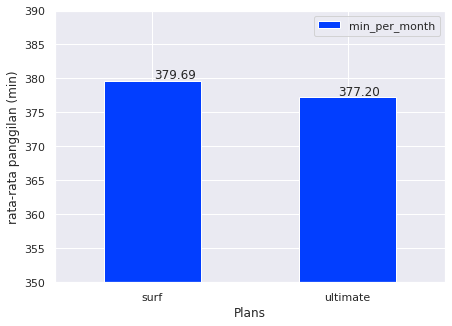

In [40]:
# Bandingkan durasi rata-rata panggilan setiap paket per bulannya. Buatlah sebuah diagram batang untuk memvisualisasikannya.
# membuat pivot table untuk merangkum rata-rata dataset durasi panggilan berdasarkan jenis paket yang digunakan
package_call = pd.pivot_table(user_usage, index = 'plan', values = 'min_per_month', aggfunc = 'mean')

# membuat bar chart dari pivot table
package_call.plot(kind = 'bar',rot = 0,figsize=(7,5))

# menentukan batas limit sumbu-y
plt.ylim(350,390)

# mendefinisikan label sumbu-x dan sumbu-y
plt.xlabel('Plans')
plt.ylabel('rata-rata panggilan (min)')

# membuat label pada bar chart
plt.text(x=0.01,y=380,s='379.69')
plt.text(x=0.95,y=377.5,s='377.20')

# menampilkan bar chart
plt.show()

Terlihat bahwa `user` dengan paket `surf` lebih banyak menghabiskan waktu dalam panggilan daripada `user` dengan paket `ultimate`

In [41]:
# mengelompokan jenis paket untuk kategori 'min_per_call' untuk jenis paket `surf` dan `ultimate`
surf = user_usage[user_usage['plan'] == 'surf']
ultimate = user_usage[user_usage['plan'] == 'ultimate']

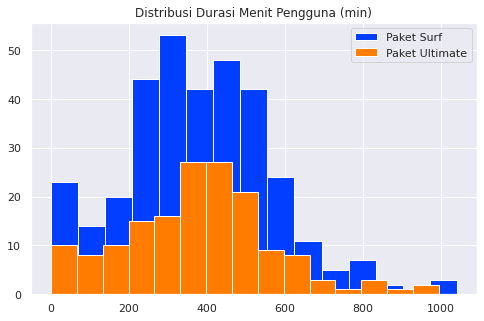

In [42]:
# Bandingkan jumlah menit yang dibutuhkan pengguna tiap paket per bulannya. Buatlah sebuah histogram.
# membuat histogram dari paket `surf` dan paket 'ultimate'
surf['min_per_month'].hist(bins=15, label = 'Paket Surf',figsize=(8,5))
ultimate['min_per_month'].hist(bins=15, label = 'Paket Ultimate')

# mendefinisikan title histogram
plt.title('Distribusi Durasi Menit Pengguna (min)')

# mendefinisikan letak legend
plt.legend(loc='upper right')

# menampilkan histogram chart
plt.show()


Terihat pada grafik:
1. Pengguna dengan paket `Surf` lebih banyak menghabiskan waktu panggilan dibandingkan dengan pelanggan paket `Ultimate`
2. Pengguna dengan paket `Surf` menggunakan panggilan pada rentang `200-500 menit`
3. Pengguna denga paket `Ultimate` menggunakan panggilan pada kisaran `370-470 menit`
4. puncak panggilan paket `surf` berada pada `300 menit`
5. puncak panggilan paket `ultimate` berada pada `400 menit`

Menghitung rata-rata dan variabel durasi panggilan untuk mempertimbangkan apakah pengguna pada paket yang berbeda memiliki perilaku penggunaan panggilan yang berbeda pula

In [43]:
# Hitung rata-rata dan varians dari durasi panggilan bulanan
# menghitung rata-rata 
mean_surf_calls = surf['min_per_month'].mean()
mean_ultimate_calls = ultimate['min_per_month'].mean()

# menampilkan output
print('Rata-rata Durasi Panggilan Pengguna Paket Surf\t   :',f'{mean_surf_calls:.2f}','menit')
print('Rata-rata Durasi Panggilan Pengguna Paket Ultimate :',f'{mean_ultimate_calls:.2f}','menit')

Rata-rata Durasi Panggilan Pengguna Paket Surf	   : 379.69 menit
Rata-rata Durasi Panggilan Pengguna Paket Ultimate : 377.20 menit


In [44]:
# menghitung varians
varians_surf_calls = np.var(surf[['min_per_month']])
varians_ultimate_calls = np.var(ultimate[['min_per_month']])

# ekstraksi value dari varians
tmp_surf = varians_surf_calls['min_per_month']
tmp_ultimate = varians_ultimate_calls['min_per_month']

# menampilkan output
print('Varians Durasi Panggilan Pengguna Paket Surf\t :',f'{tmp_surf:.2f}','menit kuadrat')
print('Varians Durasi Panggilan Pengguna Paket Ultimate :',f'{tmp_ultimate:.2f}','menit kuadrat')

Varians Durasi Panggilan Pengguna Paket Surf	 : 37357.58 menit kuadrat
Varians Durasi Panggilan Pengguna Paket Ultimate : 38073.64 menit kuadrat


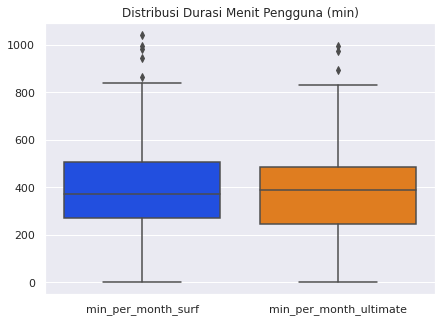

In [45]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi durasi panggilan bulanan
# menggabungkan dua dataframe `surf` dan `ultimate` kedalam satu dataframe menggunakan metode join
merging_package = surf.join(ultimate,how='outer',lsuffix='_surf', rsuffix='_ultimate')

# menampilkan boxplot durasi waktu berdasarkan paket-paketnya
plt.figure(figsize=(7,5))
sns.boxplot(data=merging_package[['min_per_month_surf','min_per_month_ultimate']])

# mendefinisikan title histogram
plt.title('Distribusi Durasi Menit Pengguna (min)')

# menampilkan boxplot
plt.show()

Dilihat dari perilaku pengguna paket berdasarkan panggilan dapat disimpulkan:
Perilaku pengguna paket `Surf` dan `Ultimate` dalam penggunaan fitur panggilan tidak jauh berbeda, akan tetapi pengguna paket `Surf` cenderung lebih sering menggunakan fitur panggilan dibandingkan dengan pengguna paket `Ultimate`

### Pesan/SMS

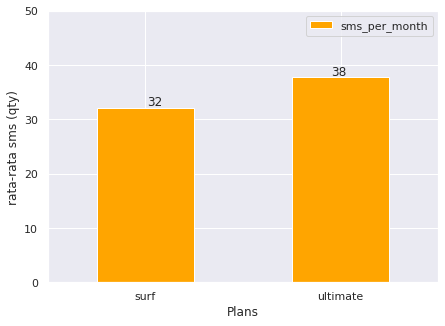

In [46]:
# Bandingkan jumlah SMS yang cenderung dikirim pengguna tiap paket per bulannya
# membuat pivot table untuk merangkum rata-rata dataset jumlah sms berdasarkan jenis paket yang digunakan
package_sms = pd.pivot_table(user_usage, index = 'plan', values = 'sms_per_month', aggfunc = 'mean')

# membuat bar chart dari pivot table
package_sms.plot(kind = 'bar',rot = 0,figsize=(7,5),color='orange')

# menentukan batas limit sumbu-y
plt.ylim(0,50)

# mendefinisikan label sumbu-x dan sumbu-y
plt.xlabel('Plans')
plt.ylabel('rata-rata sms (qty)')

# membuat label pada bar chart
plt.text(x=0.01,y=32.5,s='32')
plt.text(x=0.95,y=38,s='38')

# menampilkan bar chart
plt.show()

dapat dilihat bahwa pengguna paket `Ultimate` lebih sering menggunakan fitur sms dibandingkan pengguna paket `surf`

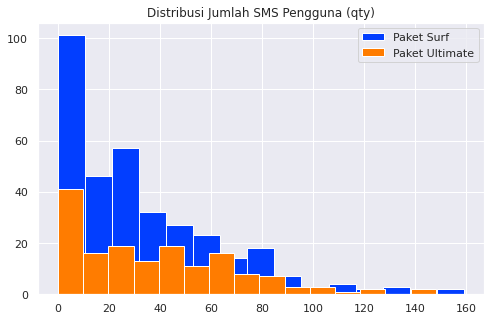

In [47]:
# Bandingkan jumlah traffic internet yang dihabiskan oleh pengguna per paket
# kita akan membuat sebuah histogram.

# membuat histogram dari paket `surf` dan paket 'ultimate'
surf['sms_per_month'].hist(bins=15, label = 'Paket Surf',figsize=(8,5))
ultimate['sms_per_month'].hist(bins=15, label = 'Paket Ultimate')

# mendefinisikan title histogram
plt.title('Distribusi Jumlah SMS Pengguna (qty)')

# mendefinisikan letak legend
plt.legend(loc='upper right')

# menampilkan histogram chart
plt.show()

Pengguna yang menggunakan paket `Surf` terlihat jarang menggunakan fitur sms jika dibandingkan dengan pengguna paket `ultimate` tetapi puncak penggunaaannya sama-sama berada pada `0-10 sms`, akan tetapi penggunakan fitur sms pada paket `Ultimate` cenderung terlihat merata dibandingkan dengan pengguna paket `surf`, terlihat bahwa fitur ini termasuk jarang digunakan karena grafik semakin landai ke kanan.

In [48]:
# menghitung rata-rata dan varians dari jumlah sms bulanan

# menghitung rata-rata 
mean_surf_sms = surf['sms_per_month'].mean()
mean_ultimate_sms = ultimate['sms_per_month'].mean()

# menampilkan output
print('Rata-rata SMS Pengguna Paket Surf     :',f'{mean_surf_sms:.2f}','sms')
print('Rata-rata SMS Pengguna Paket Ultimate :',f'{mean_ultimate_sms:.2f}','sms')

Rata-rata SMS Pengguna Paket Surf     : 32.11 sms
Rata-rata SMS Pengguna Paket Ultimate : 37.70 sms


In [49]:
# menghitung varians
varians_surf_sms = np.var(surf[['sms_per_month']])
varians_ultimate_sms = np.var(ultimate[['sms_per_month']])

# ekstraksi value dari varians
tmp_surf = varians_surf_sms['sms_per_month']
tmp_ultimate = varians_ultimate_sms['sms_per_month']

# menampilkan output
print('Varians SMS Pengguna Paket Surf     :',f'{tmp_surf:.2f}','qty kuadrat')
print('Varians SMS Pengguna Paket Ultimate :',f'{tmp_ultimate:.2f}','qty kuadrat')

Varians SMS Pengguna Paket Surf     : 963.40 qty kuadrat
Varians SMS Pengguna Paket Ultimate : 1086.56 qty kuadrat


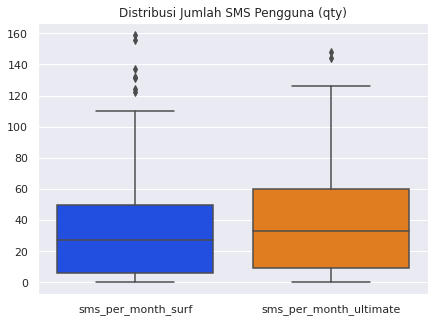

In [50]:
# membuat grafik boxplot untuk memvisualisasikan distribusi jumlah sms bulanan

# menampilkan boxplot jumlah sms berdasarkan paket-paketnya
plt.figure(figsize=(7,5))
sns.boxplot(data=merging_package[['sms_per_month_surf','sms_per_month_ultimate']])

# mendefinisikan title boxplot
plt.title('Distribusi Jumlah SMS Pengguna (qty)')

# menampilkan boxplot
plt.show()

Dilihat dari perilaku pengguna paket berdasarkan sms dapat disimpulkan:
Perilaku pengguna paket `Surf` dan `Ultimate` dalam penggunaan fitur sms tidak jauh berbeda, akan tetapi pengguna paket `Ultimate` cenderung lebih sering menggunakan fitur sms dibandingkan dengan pengguna paket `Surf`

### Internet

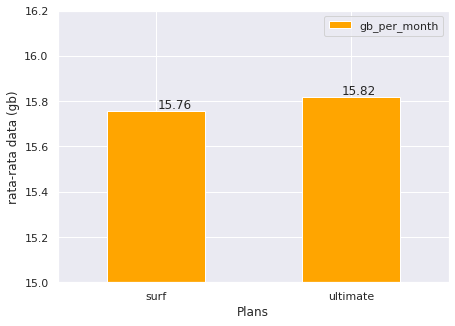

In [51]:
# membandingkan jumlah data yang cenderung dikirim pengguna tiap paket per bulannya

# membuat pivot table untuk merangkum rata-rata dataset jumlah data berdasarkan jenis paket yang digunakan
package_internet = pd.pivot_table(user_usage, index = 'plan', values = 'gb_per_month', aggfunc = 'mean')

# membuat bar chart dari pivot table
package_internet.plot(kind = 'bar',rot = 0,figsize=(7,5),color='orange')

# menentukan batas limit sumbu-y
plt.ylim(15,16.2)

# mendefinisikan label sumbu-x dan sumbu-y
plt.xlabel('Plans')
plt.ylabel('rata-rata data (gb)')

# membuat label pada bar chart
plt.text(x=0.01,y=15.77,s='15.76')
plt.text(x=0.95,y=15.83,s='15.82')

# menampilkan bar chart
plt.show()

terlihat bahwa penggunaan paket data pada paket `surf` dan `ultimate` tidak jauh berbeda akan tetapi pengguna dengan paket `ultimate` terlihat lebih banyak menghabiskan paket data perbulan

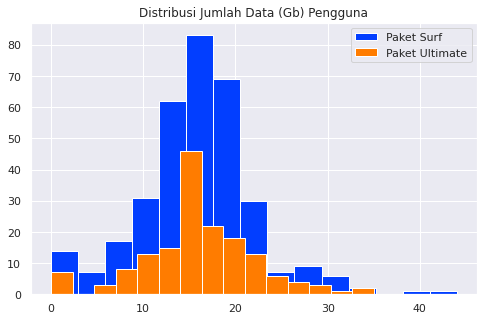

In [52]:
# membandingkan jumlah data yang dibutuhkan pengguna tiap paket per bulannya. 
# kita akan membuat sebuah histogram.

# membuat histogram dari paket `surf` dan paket 'ultimate'
surf['gb_per_month'].hist(bins=15, label = 'Paket Surf', figsize=(8,5))
ultimate['gb_per_month'].hist(bins=15, label = 'Paket Ultimate')

# mendefinisikan title histogram
plt.title('Distribusi Jumlah Data (Gb) Pengguna')

# mendefinisikan letak legend
plt.legend(loc='upper right')

# menampilkan histogram chart
plt.show()

Terlihat bahwa pengguna dengan paket `Surf` lebih banyak menghabiskan paket internet dibandingkan dengan pengguna paket `Ultimate` puncaknya pun berdekatan, akan tetapi secara distribusi pengguna dengan paket `ultimate` cenderung lwbih rata dalam penggunaan internet.

Mengingat bahwa paket `Surf` memiliki internet bawaan lebih sedikit dibandingkan `Ultimate` maka kemungkinan pengguna dengan paket ini kemungkinan cenderung lebih sering menambah biaya untuk menutupi kekurangan kebutuhan.

In [53]:
# menghitung rata-rata dan varians dari jumlah data (gb) bulanan

# menghitung rata-rata 
mean_surf_internet = surf['gb_per_month'].mean()
mean_ultimate_internet = ultimate['gb_per_month'].mean()

# menampilkan output
print('Rata-rata Jumlah Data Internet Pengguna Paket Surf     :',f'{mean_surf_internet:.2f}','gb')
print('Rata-rata Jumlah Data Internet Pengguna Paket Ultimate :',f'{mean_ultimate_internet:.2f}','gb')

Rata-rata Jumlah Data Internet Pengguna Paket Surf     : 15.76 gb
Rata-rata Jumlah Data Internet Pengguna Paket Ultimate : 15.82 gb


In [54]:
# menghitung varians
varians_surf_gb = np.var(surf[['gb_per_month']])
varians_ultimate_gb = np.var(ultimate[['gb_per_month']])

# ekstraksi value dari varians
tmp_surf = varians_surf_gb['gb_per_month']
tmp_ultimate = varians_ultimate_gb['gb_per_month']

# menampilkan output
print('Varians Jumlah Data Internet Pengguna Paket Surf     :',f'{tmp_surf:.2f}','gb kuadrat')
print('Varians Jumlah Data Internet Pengguna Paket Ultimate :',f'{tmp_ultimate:.2f}','gb kuadrat')

Varians Jumlah Data Internet Pengguna Paket Surf     : 40.72 gb kuadrat
Varians Jumlah Data Internet Pengguna Paket Ultimate : 38.64 gb kuadrat


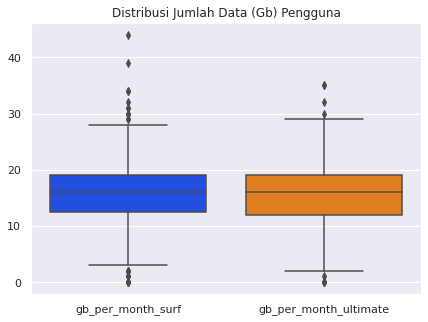

In [55]:
# membuat grafik boxplot untuk memvisualisasikan distribusi jumlah data (gb) bulanan

# menampilkan boxplot jumlah sms berdasarkan paket-paketnya
plt.figure(figsize=(7,5))
sns.boxplot(data=merging_package[['gb_per_month_surf','gb_per_month_ultimate']])

# mendefinisikan title boxplot
plt.title('Distribusi Jumlah Data (Gb) Pengguna')

# menampilkan boxplot
plt.show()

dilihat dari grafik boxplot dapat diketahui bahwa: Pengguna paket `Surf` dan `Ultimate` cenderung menghabiskan jumlah internet yang hampir sama.

## Pendapatan<a id='inc'></a>

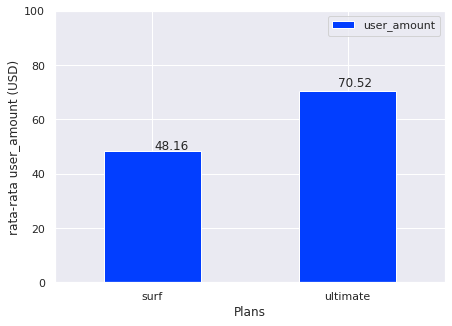

In [56]:
# membandingkan jumlah pendapatan dari pengguna tiap paket per bulannya

# membuat pivot table untuk merangkum rata-rata dataset jumlah pendapatan berdasarkan jenis paket yang digunakan
package_amount = pd.pivot_table(user_usage, index = 'plan', values = 'user_amount', aggfunc = 'mean')

# membuat bar chart dari pivot table
package_amount.plot(kind = 'bar',rot = 0, figsize=(7,5))

# menentukan batas limit sumbu-y
plt.ylim(0,100)

# mendefinisikan label sumbu-x dan sumbu-y
plt.xlabel('Plans')
plt.ylabel('rata-rata user_amount (USD)')

# membuat label pada bar chart
plt.text(x=0.01,y=49,s='48.16')
plt.text(x=0.95,y=72,s='70.52')

# menampilkan bar chart
plt.show()

dapat dilihat bahwa pengguna dengan paket `ultimate` cenderung memiliki pendapatan lebih tinggi daripada pengguna dengan paket `surf`

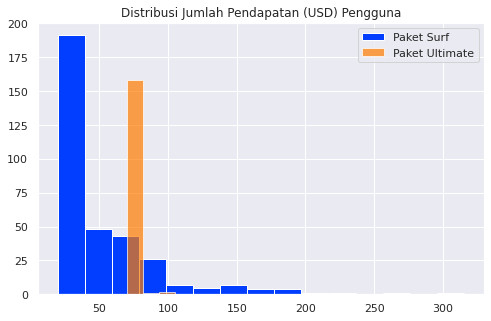

In [57]:
# membandingkan jumlah pendapatan dari pengguna tiap paket per bulannya. 
# kita akan membuat sebuah histogram.

# membuat histogram dari paket `surf` dan paket 'ultimate'
surf['user_amount'].hist(bins=15, label = 'Paket Surf',figsize=(8,5))
ultimate['user_amount'].hist(bins=3, label = 'Paket Ultimate', alpha = 0.7)

# mendefinisikan title histogram
plt.title('Distribusi Jumlah Pendapatan (USD) Pengguna')

# mendefinisikan letak legend
plt.legend(loc='upper right')

# menampilkan histogram chart
plt.show()

dari grafik dapat dilihat bahwa pengguna dengan paket `Surf` cenderung lebih banyak dengan penghasilan di bawah `50 USD` sedangkan pengguna dengan paket `Ultimate` memuncak pada kisaran `70-80 USD`, akan tetapi distribusi pengguna paket `surf` lebih banyak vaiasi dibandingkan dengan pengguna paket `Ultimate`

In [58]:
# menghitung rata-rata dan varians dari jumlah pendapatan dari pelanggan bulanan

# menghitung rata-rata 
mean_surf_amount = surf['user_amount'].mean()
mean_ultimate_amount = ultimate['user_amount'].mean()

# menampilkan output
print('Rata-rata Jumlah Pendapatan dari Pengguna Paket Surf     :',f'{mean_surf_amount:.2f}','USD')
print('Rata-rata Jumlah Pendapatan dari Pengguna Paket Ultimate :',f'{mean_ultimate_amount:.2f}','USD')

Rata-rata Jumlah Pendapatan dari Pengguna Paket Surf     : 48.16 USD
Rata-rata Jumlah Pendapatan dari Pengguna Paket Ultimate : 70.52 USD


In [59]:
# menghitung varians
varians_surf_amount = np.var(surf[['user_amount']])
varians_ultimate_amount = np.var(ultimate[['user_amount']])

# ekstraksi value dari varians
tmp_surf = varians_surf_amount['user_amount']
tmp_ultimate = varians_ultimate_amount['user_amount']

# menampilkan output
print('Varians Jumlah Pendapatan dari Pengguna Paket Surf     :',f'{tmp_surf:.2f}','USD kuadrat')
print('Varians Jumlah Pendapatan dari Pengguna Paket Ultimate :',f'{tmp_ultimate:.2f}','USD kuadrat')

Varians Jumlah Pendapatan dari Pengguna Paket Surf     : 1777.84 USD kuadrat
Varians Jumlah Pendapatan dari Pengguna Paket Ultimate : 16.16 USD kuadrat


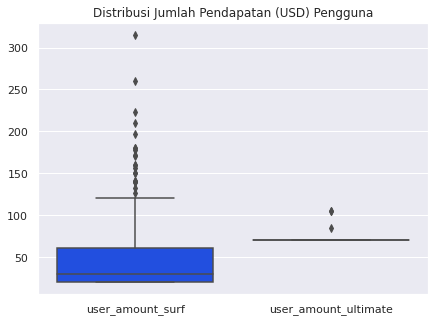

In [60]:
# membuat grafik boxplot untuk memvisualisasikan distribusi jumlah pendapatan dari pelanggan bulanan

# menampilkan boxplot jumlah sms berdasarkan paket-paketnya
plt.figure(figsize=(7,5))
sns.boxplot(data=merging_package[['user_amount_surf','user_amount_ultimate']])

# mendefinisikan title boxplot
plt.title('Distribusi Jumlah Pendapatan (USD) Pengguna')

# menampilkan boxplot
plt.show()

Dari grafik boxplot dapat disimpulkan bahwa pengguna dengan paket `Surf` cenderung memiliki pendapatan lebih rendah dengan varians yang lebih beragam dibandingkan dengan pengguna paket `Ultimate`

# Menguji Hipotesis Statistik<a id='hipo'></a>

## Hipotesis 1

Ujilah hipotesis yang menyatakan bahwa pendapatan rata-rata dari pengguna paket prabayar Ultimate dan Surf berbeda

Selanjutnya kita akan menguji suatu hipotesis yang menyatakan bahwa `Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Berbeda`. Mari kita rangkum hipotesisnya sebagai berikut:

* Hipotesis Nol: `Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Sama`
* Hipotesis Alternatif: `Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Berbeda`

Mari kita uji menggunakan library scipy.

In [61]:
# Uji hipotesisnya
# menguji hipotesis 1:
# mendefinisikan signifikasi sebesar 5%
alpha = 0.05

# menguji apakah pendapatan pada paket `surf` dan paket `ultimate` memiliki kesamaan menggunakan `ttest_ind`
results = st.ttest_ind(surf['user_amount'],ultimate['user_amount'],equal_var=False)

# menampilkan p-value
print('p-value',results.pvalue)

# pengujian hipotesis
if results.pvalue < alpha:
    # hipotesis alternatif = "Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Berbeda" 
    print('Kita menolak hipotesis nol')
else:
    # hipotesis nol = "Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Sama"
    print('Kita tidak dapat menolak hipotesis nol')

p-value 9.973982812516747e-20
Kita menolak hipotesis nol


Dari hasil pengujian hipotesis menunjukan `Penolakan terhadap Hipotesis Nol` dimana `Hipotesis Alternatif yang Disetujui` yang berarti bahwa `"Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Berbeda"`. Hal ini sesuai dengan analisis pendapatan dari pengguna pada pembahasan sebelumnya bahwa `Pendapatan dari Paket Ultimate Lebih Besar dari Paket Surf`.

## Hipotesis 2

Ujilah hipotesis bahwa pendapatan rata-rata dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain

Selanjutnya kita akan menguji suatu hipotesis yang menyatakan bahwa `Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ Berbeda dengan Pendapatan Pengguna dari Wilayah Lain`. Mari kita rangkum hipotesisnya sebagai berikut:

* Hipotesis Nol: `Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ dengan Wilayah Lain adalah Sama`
* Hipotesis Alternatif: `Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ dengan Wilayah Lain adalah Berbeda`


Mari kita uji menggunakan library scipy.

In [62]:
# membuat filter pendapatan berdasarkan region 'NY-NJ' dengan region 'other'
ny_nj_amount = user_usage[user_usage['region'] == 'NY-NJ']
other_amount = user_usage[user_usage['region'] == 'other']

In [63]:
# Uji hipotesisnya
# menguji hipotesis 2:
# mendefinisikan signifikasi sebesar 5%
alpha = 0.05

# menguji apakah pendapatan pada region `NY-NJ` dan region `Other` memiliki kesamaan menggunakan `ttest_ind`
results = st.ttest_ind(ny_nj_amount['user_amount'],other_amount['user_amount'],equal_var=False)

# menampilkan p-value
print('p-value',results.pvalue)

# pengujian hipotesis
if results.pvalue < alpha:
    # hipotesis alternatif = "Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ dengan Wilayah Lain adalah Berbeda" 
    print('Kita menolak hipotesis nol')
else:
    # hipotesis nol = "Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ dengan Wilayah Lain adalah Sama"
    print('Kita tidak dapat menolak hipotesis nol')

p-value 0.4268835575367236
Kita tidak dapat menolak hipotesis nol


Dari hasil pengujian hipotesis menunjukan `Penolakan terhadap Hipotesis Nol` dimana `Hipotesis Alternatif yang Disetujui` yang berarti bahwa `"Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ Berbeda dengan Pendapatan Pengguna dari Wilayah Lain"`. yang berarti `Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ sama dengan Pendapatan Pengguna dari Wilayah Lain`

# Kesimpulan Umum<a id='conc'></a>

1. Untuk kategori durasi telepon terbanyak dalam satu bulan dimiliki oleh Paket `Surf` dengan durasi panggilan `379.69 menit` sedangkan paket `Ultimate` `377.20 menit`
2. Untuk kategori jumlah sms terbanyak dalam satu bulan dimiliki oleh Paket `Ultimate` dengan jumlah pesan `37.70 sms` sedangkan paket `Surf` `32.11 sms`
3. Rata-rata penggunaan kisaran jumlah data internet per bulan untuk kedua tipe Paket Prabayar berkisar pada `15-16 GB` dimana paket `Surf` `15.76 GB` dan paket `Ultimate` `15.82 GB`
4. Jumlah pendapatan terbanyak dari pengguna per bulan dimiliki oleh Paket `Ultimate` yaitu `70.52 USD` sedangkan pengguna dengan paket `Surf` memiliki pendapatan `48.16 USD`
5. Dilihat dari `Hipotesis 1` dapat diketahui bahwa Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Berbeda
6. Dilihat dari `Hipotesis 2` dapat diketahui bahwa  Pengguna di Wilayah NY-NJ dengan Wilayah Lain adalah sama
7. Pengguna dengan paket `Surf` terlihat lebih sering menggunakan fitur telepon dibandingkan dengan pengguna dengan paket `Ultimate`
8. Pengguna dengan paket `Ultimate` lebih sering menggunakan fitur `message` dan `internet` serta memiliki `pendapatan` lebih tinggi daripada pengguna dengan paket `Surf`
9. Melihat dari penggunaan yang digunakan `user` berdasarkan paket yang dipilih kecenderungan pengguna dengan paket `Surf` adalah membeli tambahan karna dilihat dari rata-rata penggunaan `calls`, `message` dan `internet` mendekati paket `Ultimate` yang mana limit dari paket `Ultimate` jauh lebih banyak dibandingkan paket `Surf`

## Temuan
1. data `user`, `calls` `message` dan `internet` terdapat kolom dengan `type data` yang salah terutama yang berhubungan dengan tanggal
2. pengelompokkan `user` berdasarkan `region` terbukti membantu dalam melakukan analisa terhadap `hipotesis 2`
3. Penghitungan `hipotesis` menggunakan ibrary `scipy` membantu dalam analisa
4. Pengguna dengan paket `Surf` cenderung lebih sering membeli tambahan paket

## Rekomendasi

Berdasarkan kecenderungan sifat pengguna pada paket `Surf` dan `Ultimate` akan lebih baik jika kedua paket ini dijadikan satu paket baru yang memiliki kriteria berbeda. Penggunaan fitur `calls` memiliki rata-rata `300-400 menit` perbulannya sehinggan pemberian paket telepon `500 menit` sudah dirasa tepat. Penggunaan `message` secara rata-rata berkisar dari `30-40 sms` perbulannya maka pemberian paket data `50 sms` dirasa sudah cukup tepat. Pada fitur `internet` terlihat bahwa rata-rata penggunaannya berkisar pada `15-16 GB` pemberian paket internet `Surf` masih tergolong kurang sedangkan paket `Ultimate` membuat pengguna merasa rugi karna kelebihan lebih dari `14 GB` untuk mengatasi masalah ini penambahan paket `internet` hingga `20 GB` dirasa dapat menjadi solusi. Karena terjadinya penambahan maka harga perpaket juga akan berubah. Mengingat bahwa pendapatan rata-rata pengguna paket `Surf` adalah `48.16 GB` dengan harga paket `Surf` lama adalah `20 USD` maka penambahan sehingga `30 USD` dirasa sudah paling tepat. Untuk itu harga penambahan apabila dibutuhkan yang lain kira-kira bisa ditambahkan menjadi: 1 menit: `2 sen`, 1 SMS: `2 sen`, 1 GB data: `10 USD`.

**Premium**
1. Biaya bulanan: 30 USD
2. 500 menit durasi panggilan per bulan, 50 SMS, dan 20 GB data

Setelah melebihi batas paket, akan dikenakan:
* 1 menit: 2 sen
* 1 SMS: 2 sen
* 1 GB data: 12 USD

[Kembali](#back)